In [3]:
!pip install tensorflow matplotlib

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1006)'))) - skipping


In [17]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16()
input_img = load_img('panda.jpg', target_size=(224, 224))
img_array = img_to_array(input_img)
reshaped_data = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
processed_img = preprocess_input(reshaped_data)
predictions = vgg_model.predict(processed_img)
decoded_labels = decode_predictions(predictions)
top_prediction = decoded_labels[0][0]
print('%s (%.2f%%)' % (top_prediction[1], top_prediction[2]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
giant_panda (99.99%)


In [14]:
!pip install tensorflow keras scikit-learn numpy matplotlib pillow requests opencv-python seaborn plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 3.1 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.8 MB 3.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.8 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/9.8 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.8 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.8 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.8 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/9.8 MB 3.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.9/9.8 MB 3.9 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 3.9 MB/s eta 0:00:02
   --------- -------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\aida-lab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


VGG16 feature extractor loaded successfully!
Running VGG16 clustering on CIFAR-10...
Loading CIFAR-10 data...
Extracting features...
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
Reducing dimensions...
Performing clustering...


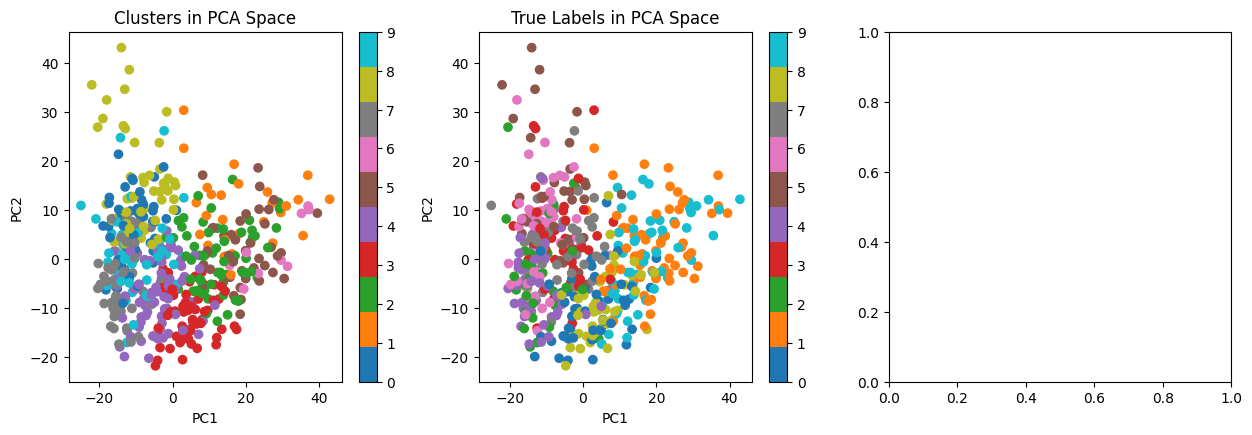

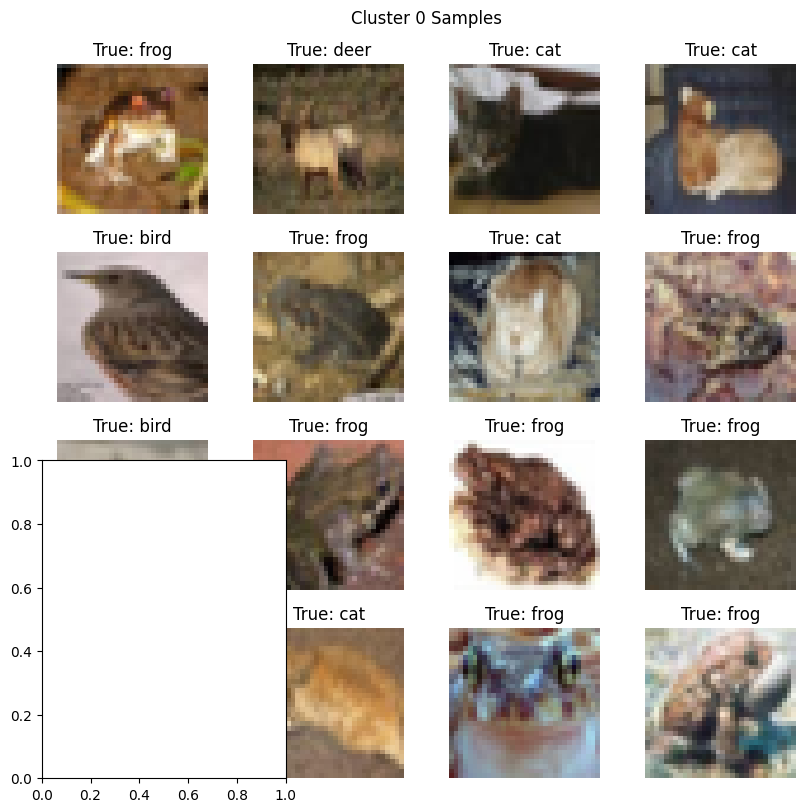

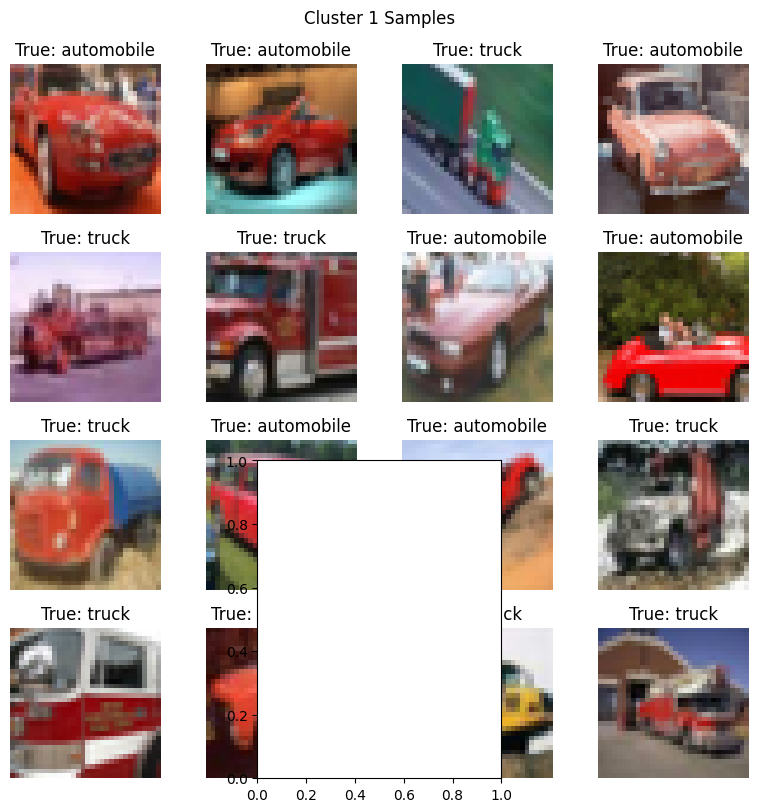

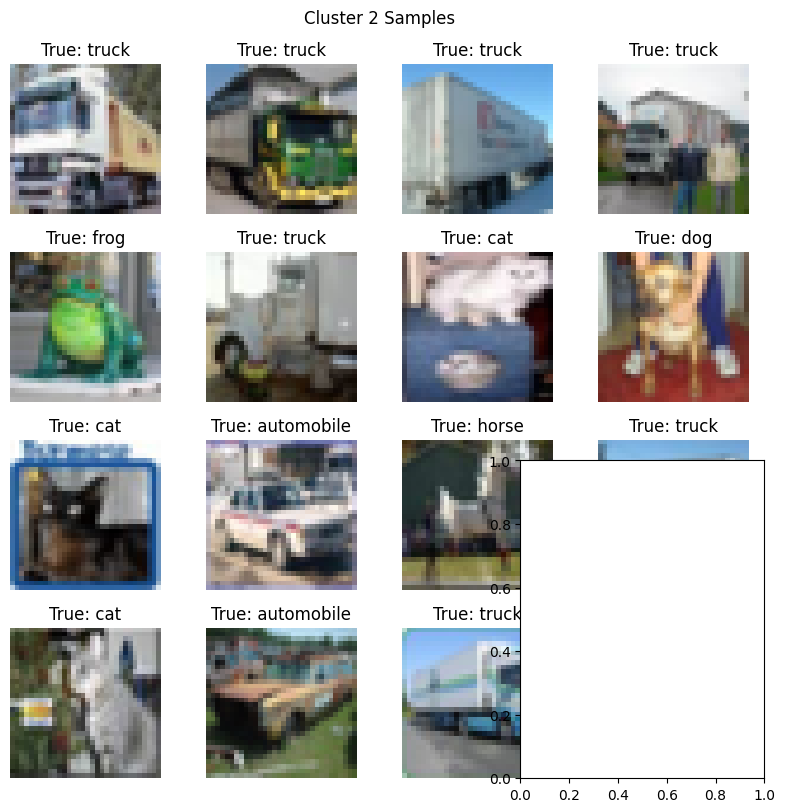

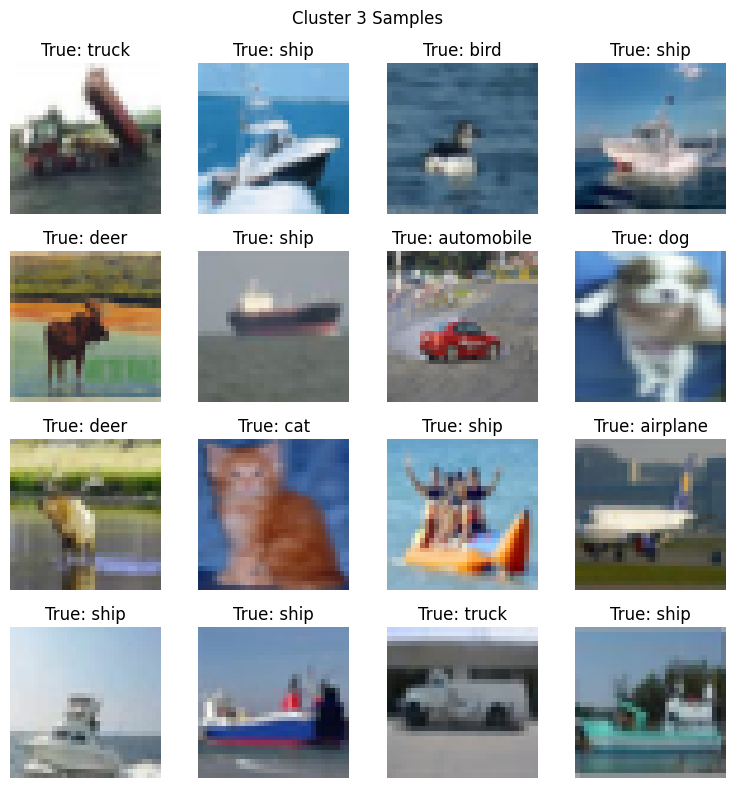


Clustering Metrics:
Adjusted Rand Index: 0.2393
Silhouette Score: 0.0539

Testing with custom image...
Error processing custom image: cannot identify image file <_io.BytesIO object at 0x000002008482D210>


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

class VGG16Clustering:
    def __init__(self, n_clusters=10):
        # Load VGG16 without the top classification layer
        self.feature_extractor = VGG16(weights='imagenet', 
                                     include_top=False, 
                                     pooling='avg')
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        self.pca = PCA(n_components=50)  # Reduce dimensions for clustering
        
        print("VGG16 feature extractor loaded successfully!")
        
    def extract_features(self, images):
        resized_images = tf.image.resize(images, [224, 224])
        preprocessed = preprocess_input(resized_images)
        features = self.feature_extractor.predict(preprocessed, verbose=1)
        return features
    
    def load_cifar10_data(self, num_samples=1000):
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_data = x_train[:num_samples]
        y_data = y_train[:num_samples]
        x_data = x_data.astype('float32')
        
        return x_data, y_data
    
    def cluster_images(self, num_samples=1000):
        print("Loading CIFAR-10 data...")
        images, labels = self.load_cifar10_data(num_samples)
        print("Extracting features...")
        features = self.extract_features(images)
        print("Reducing dimensions...")
        features_reduced = self.pca.fit_transform(features)
        print("Performing clustering...")
        cluster_labels = self.kmeans.fit_predict(features_reduced)
        return images, labels, cluster_labels, features_reduced
    
    def visualize_clusters(self, images, true_labels, cluster_labels, features_reduced):
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                      'dog', 'frog', 'horse', 'ship', 'truck']
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 3, 1)
        scatter = plt.scatter(features_reduced[:, 0], features_reduced[:, 1], 
                            c=cluster_labels, cmap='tab10')
        plt.title('Clusters in PCA Space')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.colorbar(scatter)
        
        plt.subplot(2, 3, 2)
        scatter = plt.scatter(features_reduced[:, 0], features_reduced[:, 1], 
                            c=true_labels.flatten(), cmap='tab10')
        plt.title('True Labels in PCA Space')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.colorbar(scatter)
        for cluster_id in range(min(4, self.n_clusters)):
            cluster_indices = np.where(cluster_labels == cluster_id)[0]
            
            plt.subplot(2, 3, cluster_id + 3)
            sample_indices = cluster_indices[:16]
            
            fig_cluster = plt.figure(figsize=(8, 8))
            for i, idx in enumerate(sample_indices):
                plt.subplot(4, 4, i + 1)
                plt.imshow(images[idx].astype('uint8'))
                plt.title(f'True: {class_names[true_labels[idx][0]]}')
                plt.axis('off')
            
            plt.suptitle(f'Cluster {cluster_id} Samples')
            plt.tight_layout()
        
        plt.tight_layout()
        plt.show()
    
    def test_custom_image(self, img_path):
      
        try:
            if img_path.startswith('http'):
                import requests
                from io import BytesIO
                response = requests.get(img_path)
                img = Image.open(BytesIO(response.content))
            else:
                img = Image.open(img_path)
            img_32 = img.resize((32, 32))
            img_array = np.array(img_32)
            
            if len(img_array.shape) == 2:  
                img_array = np.stack([img_array] * 3, axis=-1)
            img_batch = np.expand_dims(img_array, axis=0)
            features = self.extract_features(img_batch)
            features_reduced = self.pca.transform(features)
            
            # Predict cluster
            cluster_pred = self.kmeans.predict(features_reduced)[0]
            
            # Display results
            plt.figure(figsize=(10, 4))
            
            plt.subplot(1, 2, 1)
            plt.imshow(img_32)
            plt.title(f'Custom Image\nPredicted Cluster: {cluster_pred}')
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.scatter(self.features_reduced[:, 0], self.features_reduced[:, 1], 
                       c=self.cluster_labels, cmap='tab10', alpha=0.6)
            plt.scatter(features_reduced[0, 0], features_reduced[0, 1], 
                       c='red', s=200, marker='*', label='Custom Image')
            plt.title('Custom Image in Cluster Space')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.legend()
            
            plt.tight_layout()
            plt.show()
            
            print(f"Custom image assigned to cluster: {cluster_pred}")
            
        except Exception as e:
            print(f"Error processing custom image: {e}")
    
    def run_clustering(self, num_samples=1000):
        """
        Run the complete clustering pipeline
        """
        # Perform clustering
        images, true_labels, cluster_labels, features_reduced = self.cluster_images(num_samples)
        
        # Store for custom image testing
        self.features_reduced = features_reduced
        self.cluster_labels = cluster_labels
        
        # Visualize results
        self.visualize_clusters(images, true_labels, cluster_labels, features_reduced)
        
        # Calculate clustering metrics
        from sklearn.metrics import adjusted_rand_score, silhouette_score
        
        ari = adjusted_rand_score(true_labels.flatten(), cluster_labels)
        silhouette = silhouette_score(features_reduced, cluster_labels)
        
        print(f"\nClustering Metrics:")
        print(f"Adjusted Rand Index: {ari:.4f}")
        print(f"Silhouette Score: {silhouette:.4f}")
        
        return images, true_labels, cluster_labels, features_reduced

# Example usage
if __name__ == "__main__":
    # Initialize clustering
    clustering = VGG16Clustering(n_clusters=10)
    
    # Run clustering on CIFAR-10
    print("Running VGG16 clustering on CIFAR-10...")
    images, true_labels, cluster_labels, features_reduced = clustering.run_clustering(num_samples=500)
    
    # Test with custom image
    print("\nTesting with custom image...")
    
    # You can test with local file or URL
    # Example: Local file
    # custom_img_path = input("Enter image path or filename: ")
    
    # Example: URL
    custom_img_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg"
    
    clustering.test_custom_image(custom_img_path)
    
    # For interactive testing, uncomment:
    # while True:
    #     img_path = input("\nEnter image path (or 'quit' to exit): ")
    #     if img_path.lower() == 'quit':
    #         break
    #     clustering.test_custom_image(img_path)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import array_to_img
import tensorflow as tf
(train_images, train_targets), _ = cifar10.load_data()
image_subset = train_images[:1000]

resized_imgs = tf.image.resize(image_subset, (224, 224))
preprocessed_data = preprocess_input(resized_imgs)

backbone_net = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
extractor_model = Model(inputs=backbone_net.input, outputs=backbone_net.output)

extracted_features = extractor_model.predict(preprocessed_data, batch_size=32, verbose=1)
flattened_features = extracted_features.reshape(extracted_features.shape[0], -1)

dimension_reducer = PCA(n_components=100)
reduced_features = dimension_reducer.fit_transform(flattened_features)

cluster_count = 10
clustering_algo = KMeans(n_clusters=cluster_count, random_state=42)
predicted_clusters = clustering_algo.fit_predict(reduced_features)

plt.figure(figsize=(12, 8))
for group in range(cluster_count):
    sample_indices = np.where(predicted_clusters == group)[0][:5]
    for j, sample_idx in enumerate(sample_indices):
        plt.subplot(cluster_count, 5, group * 5 + j + 1)
        plt.imshow(image_subset[sample_idx])
        plt.axis('off')
        if j == 0:
            plt.title(f"Cluster {group}")
plt.suptitle("Image Clustering using ResNet50 + KMeans", fontsize=16)
plt.tight_layout()
plt.show()

Adjusted Rand Index: 0.2535
Silhouette Score: 0.0608
Custom image assigned to cluster: 0
